In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam, RMSprop

In [9]:
data = pd.read_csv('AUBANK_minute.csv')

In [10]:
data.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
dtype: object

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701932 entries, 0 to 701931
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    701932 non-null  object 
 1   open    701932 non-null  float64
 2   high    701932 non-null  float64
 3   low     701932 non-null  float64
 4   close   701932 non-null  float64
 5   volume  701932 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 32.1+ MB


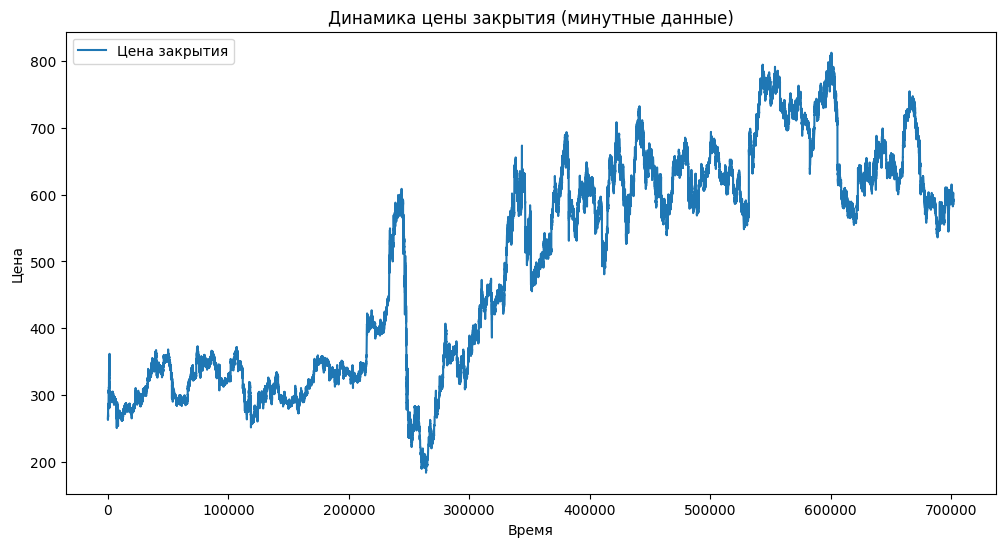

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data["close"], label="Цена закрытия")
plt.title("Динамика цены закрытия (минутные данные)")
plt.xlabel("Время")
plt.ylabel("Цена")
plt.legend()
plt.show()

In [13]:
scaler = StandardScaler()

In [14]:
def data_load(file_path, test_size):
    data = pd.read_csv(file_path)

    data['date'] = pd.to_datetime(data['date'])
    data.set_index('date', inplace=True)
    data.isnull().sum() 

    for i in range(1, 6):
        data[f'lag_{i}_close'] = data['close'].shift(i)

    data = data.dropna().reset_index(drop=True)

    features = ['open', 'high', 'low', 'volume'] + [f'lag_{i}_close' for i in range(1, 6)]
    X = data[features].values.astype('float32')
    Y = data['close'].values.astype('float32')
    
    X_scaled = scaler.fit_transform(X)
    Y_scaled = scaler.fit_transform(Y.reshape(-1, 1))

    X_train, X_test = X_scaled[6:-test_size], X_scaled[-test_size:]
    Y_train, Y_test = Y_scaled[6:-test_size], Y_scaled[-test_size:]

    return X_train, X_test, Y_train, Y_test

In [15]:
def create_model(optimizer='sgd', learning_rate=0.001, momentum=0.9):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1))

    if optimizer == 'gd':
        opt = GD(lea)
    elif optimizer == 'momentum':
        opt = SGD(learning_rate=learning_rate, momentum=momentum)
    elif optimizer == 'rmsprop':
        opt = RMSprop(learning_rate=learning_rate)
    elif optimizer == 'adam':
        opt = Adam(learning_rate=learning_rate)
    elif optimizer == 'sgd':  
        opt = SGD(learning_rate=learning_rate, momentum=0.0)
    
    model.compile(optimizer=opt, loss='mse')
    return model

In [16]:
def plot_results(history, Y_test, Y_pred, scaler):
    
    plt.figure(figsize=(12, 5))
    plt.plot(history.history['loss'])
    plt.title('График потерь (MSE)')
    plt.xlabel('Эпоха')
    plt.ylabel('Loss')
 
    plt.figure(figsize=(12, 6))
    plt.plot(Y_test, label='Реальные значения', marker='o')
    plt.plot(Y_pred, label='Предсказанные', linestyle='--', marker='x')
    plt.title('Реальные vs Предсказанные значения (Close)')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [21]:
X_train, X_test, Y_train, Y_test = data_load('AUBANK_minute.csv', 50)

model = create_model(
    optimizer='sgd',
    learning_rate=0.01)

history = model.fit(X_train, Y_train, epochs=100, batch_size=len(X_train) , verbose=1)

Y_pred_scaled = model.predict(X_test)

Y_pred = scaler.inverse_transform(Y_pred_scaled)
Y_test_actual = scaler.inverse_transform(Y_test)

Epoch 1/100
1/1 [==============================] - 1s 822ms/step - loss: 1.1444
Epoch 2/100
1/1 [==============================] - 1s 521ms/step - loss: 0.7756
Epoch 3/100
1/1 [==============================] - 0s 468ms/step - loss: 0.5380
Epoch 4/100
1/1 [==============================] - 1s 503ms/step - loss: 0.3833
Epoch 5/100
1/1 [==============================] - 0s 459ms/step - loss: 0.2802
Epoch 6/100
1/1 [==============================] - 0s 459ms/step - loss: 0.2070
Epoch 7/100
1/1 [==============================] - 0s 495ms/step - loss: 0.1538
Epoch 8/100
1/1 [==============================] - 0s 465ms/step - loss: 0.1143
Epoch 9/100
1/1 [==============================] - 0s 479ms/step - loss: 0.0851
Epoch 10/100
1/1 [==============================] - 0s 468ms/step - loss: 0.0639
Epoch 11/100
1/1 [==============================] - 0s 473ms/step - loss: 0.0486
Epoch 12/100
1/1 [==============================] - 0s 468ms/step - loss: 0.0374
Epoch 13/100
1/1 [===================

Графики для gd


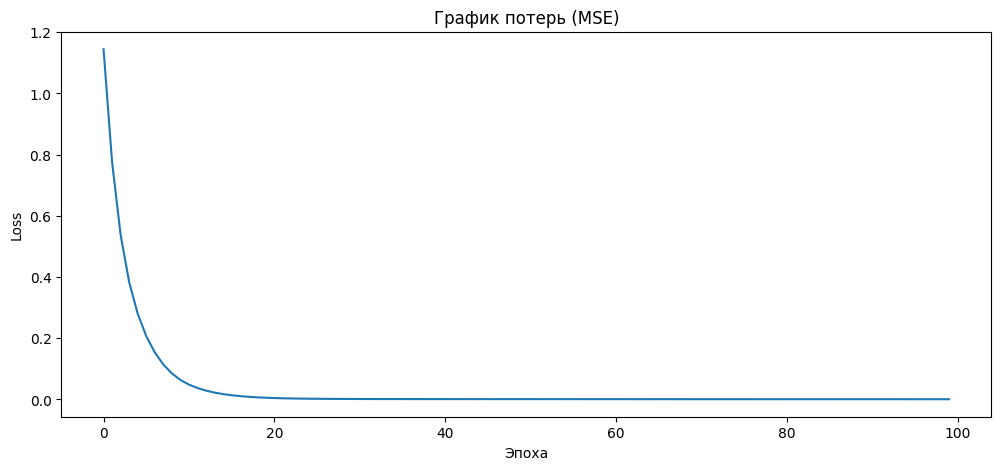

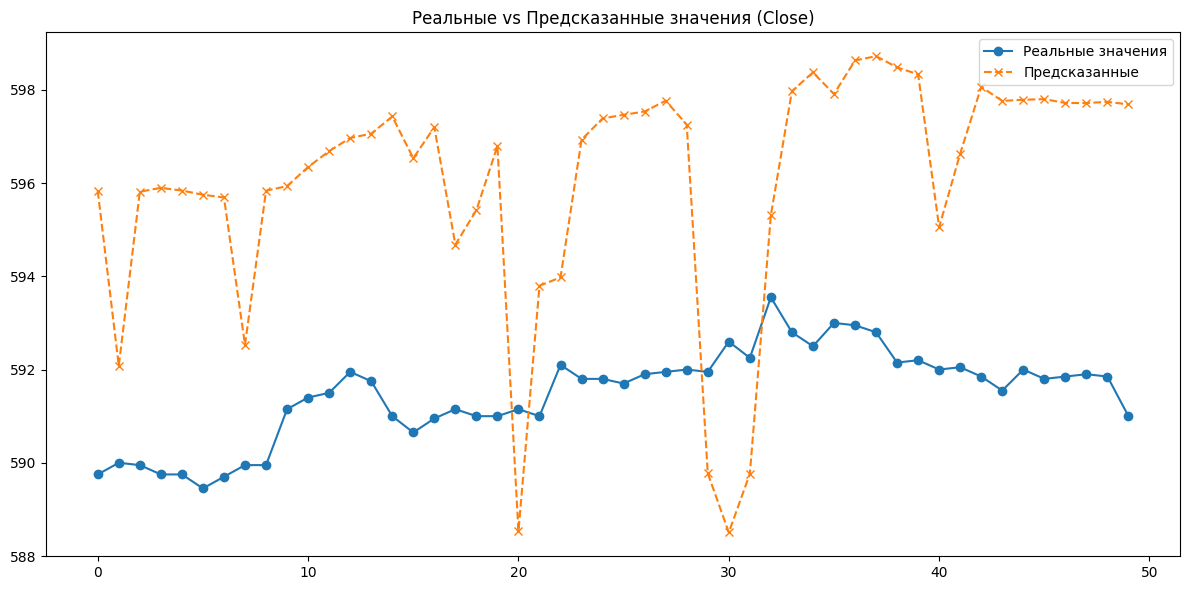

In [22]:
print('Графики для gd')
plot_results(history=history, Y_test=Y_test_actual, Y_pred=Y_pred, scaler=scaler)

In [ ]:
X_train, X_test, Y_train, Y_test = data_load('AUBANK_minute.csv', 50)

model = create_model(
    optimizer='sgd',
    learning_rate=0.001)

history = model.fit(X_train, Y_train, epochs=10, batch_size=128, verbose=0)

Y_pred_scaled = model.predict(X_test)

Y_pred = scaler.inverse_transform(Y_pred_scaled)
Y_test_actual = scaler.inverse_transform(Y_test)

Графики для sgd


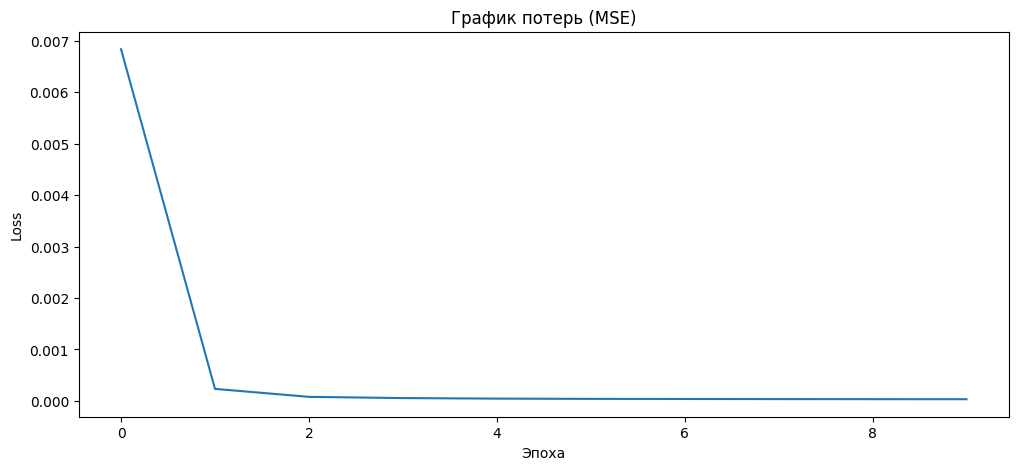

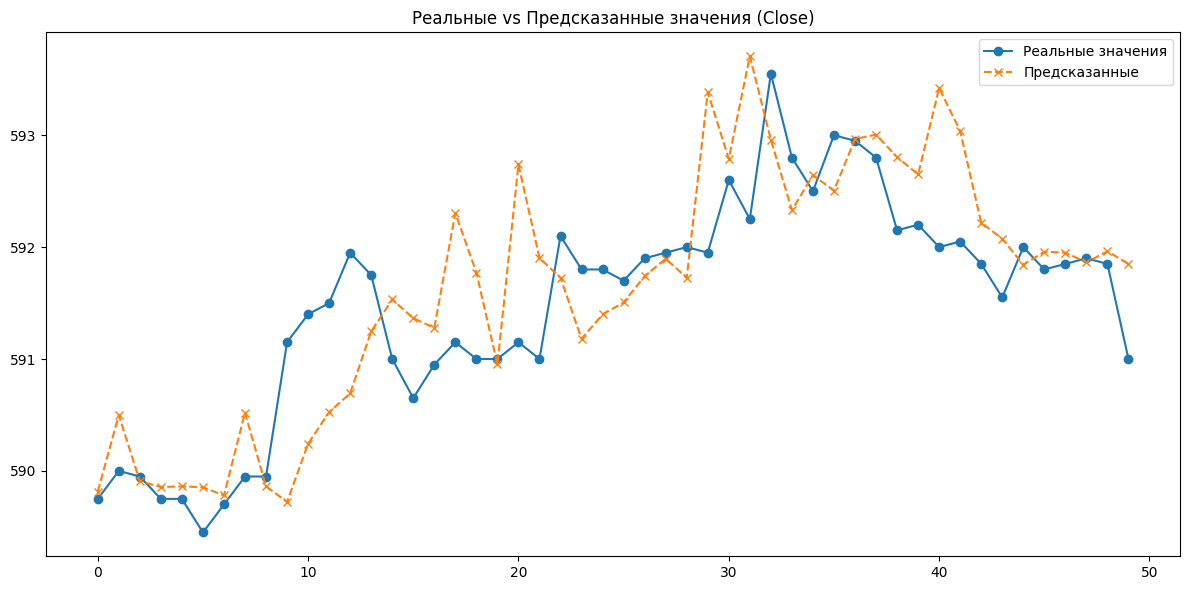

In [31]:
print('Графики для sgd')
plot_results(history=history, Y_test=Y_test_actual, Y_pred=Y_pred, scaler=scaler)

In [24]:
X_train, X_test, Y_train, Y_test = data_load('AUBANK_minute.csv', 50)

model = create_model(
    optimizer='adam',
    learning_rate=0.001)

history = model.fit(X_train, Y_train, epochs=30, batch_size=128, verbose=1)

Y_pred_scaled = model.predict(X_test)

Y_pred = scaler.inverse_transform(Y_pred_scaled)
Y_test_actual = scaler.inverse_transform(Y_test)

Epoch 1/30
5484/5484 [==============================] - 8s 1ms/step - loss: 0.0017
Epoch 2/30
5484/5484 [==============================] - 7s 1ms/step - loss: 0.0013
Epoch 3/30
5484/5484 [==============================] - 7s 1ms/step - loss: 3.7441e-04
Epoch 4/30
5484/5484 [==============================] - 7s 1ms/step - loss: 1.9976e-04
Epoch 5/30
5484/5484 [==============================] - 7s 1ms/step - loss: 7.8227e-04
Epoch 6/30
5484/5484 [==============================] - 7s 1ms/step - loss: 1.8416e-04
Epoch 7/30
5484/5484 [==============================] - 7s 1ms/step - loss: 8.2646e-05
Epoch 8/30
5484/5484 [==============================] - 7s 1ms/step - loss: 3.9855e-05
Epoch 9/30
5484/5484 [==============================] - 7s 1ms/step - loss: 9.4238e-05
Epoch 10/30
5484/5484 [==============================] - 7s 1ms/step - loss: 1.2399e-04
Epoch 11/30
5484/5484 [==============================] - 7s 1ms/step - loss: 2.6353e-04
Epoch 12/30
5484/5484 [==========================

Графики для adam


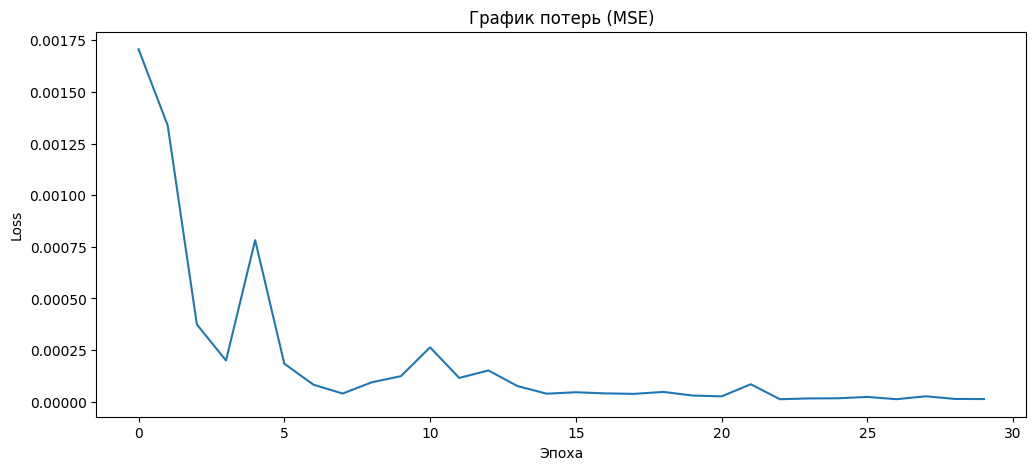

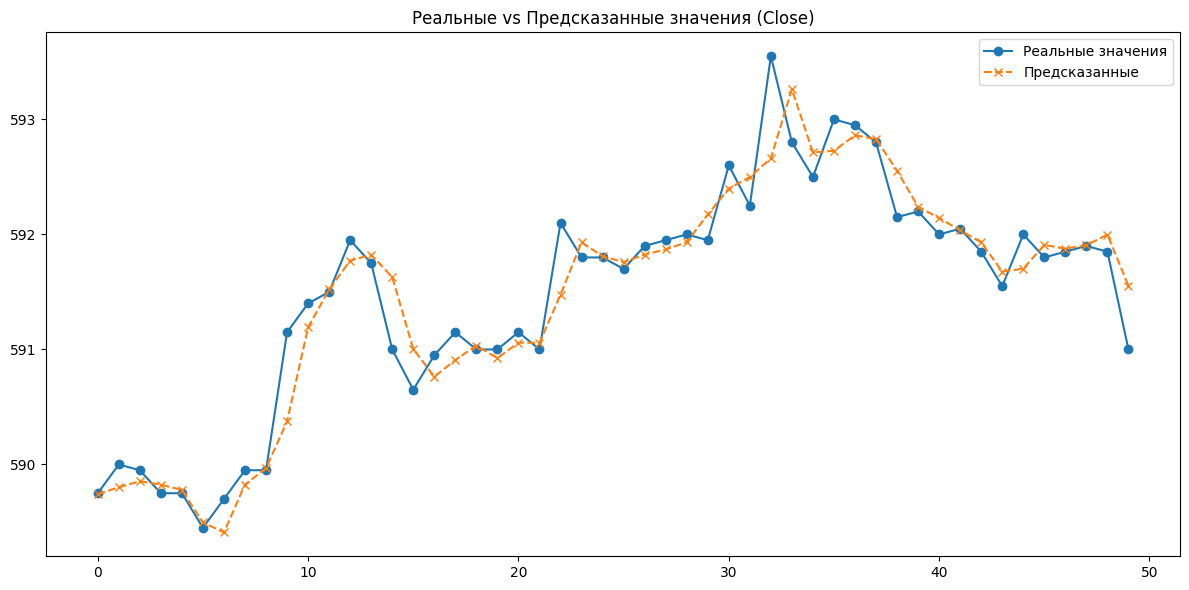

In [25]:
print('Графики для adam')
plot_results(history=history, Y_test=Y_test_actual, Y_pred=Y_pred, scaler=scaler)